<a href="https://colab.research.google.com/github/ragunath07/Car_price_prediction/blob/main/age_and_gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Image Data Generator multiple images are created through duplication,with the available images.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#path='/content/drive/MyDrive/dataset/age and gender/female/50+'
for img in os.listdir(path):
  img=os.path.join(path,img)
  img=load_img(img)  
  x = img_to_array(img) 
  x = x.reshape((1,) + x.shape)

  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/dataset/Age dataset/50+',
                            save_prefix='img', 
                            save_format='jpeg'):
    i += 1
    if i > 6:
      break

Importing all the necessary libraries for the building of Neural Network.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

Processing the Gender Dataset for the better output of the model.

In [ ]:
path='/content/drive/MyDrive/dataset/Gender dataset'    #path for the input file

image_data_generator= ImageDataGenerator(rescale=1/255) #rescaling the image or normalisation
train=tf.keras.preprocessing.image.DirectoryIterator(
    path,                                               
    image_data_generator,
    target_size=(200,200),                               #resizing all the images in the range(200,200) 
    color_mode='rgb', 
    classes=['male','female'], 
    class_mode='binary',
    batch_size=25, 
    shuffle=True
)
train.class_indices


Found 1263 images belonging to 2 classes.


{'female': 1, 'male': 0}

Building the Nueral Network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu,input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3),  activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3),  activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1,  activation=tf.nn.sigmoid)
])    

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
history=model.fit(train,batch_size=10,epochs=15,verbose=1)

Epoch 1/15
51/51 [==============================] - 90s 2s/step - loss: 0.6762 - accuracy: 0.6223
Epoch 2/15
51/51 [==============================] - 54s 1s/step - loss: 0.6623 - accuracy: 0.6247
Epoch 3/15
51/51 [==============================] - 54s 1s/step - loss: 0.6215 - accuracy: 0.6413
Epoch 4/15
51/51 [==============================] - 53s 1s/step - loss: 0.6066 - accuracy: 0.6334
Epoch 5/15
51/51 [==============================] - 53s 1s/step - loss: 0.5546 - accuracy: 0.6928
Epoch 6/15
51/51 [==============================] - 55s 1s/step - loss: 0.5113 - accuracy: 0.7356
Epoch 7/15
51/51 [==============================] - 54s 1s/step - loss: 0.4716 - accuracy: 0.7625
Epoch 8/15
51/51 [==============================] - 54s 1s/step - loss: 0.4301 - accuracy: 0.7933
Epoch 9/15
51/51 [==============================] - 54s 1s/step - loss: 0.3879 - accuracy: 0.8147
Epoch 10/15
51/51 [==============================] - 54s 1s/step - loss: 0.3271 - accuracy: 0.8519
Epoch 11/15
51/51 [

Saving the model as a Pickle file for the future usage

In [ ]:
import pickle
with open('Gender_model.pkl', 'wb') as file:
  pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://191b3307-702b-4c36-ae03-a0a941b777cc/assets


Loss plot

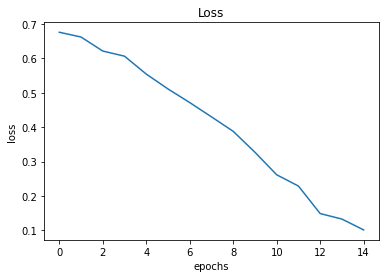

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Accuracy plot

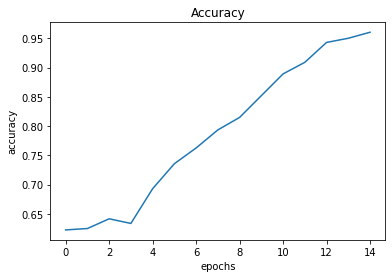

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


Data processing of Age Dataset

In [ ]:
path='/content/drive/MyDrive/dataset/Age dataset'
age=image_data_generator.flow_from_directory(path,                          #path of the file
                                             target_size=(200,200),         #image resizing
                                             batch_size=30,
                                             class_mode='categorical')
age.class_indices

Found 2970 images belonging to 3 classes.


{'30-50': 0, '50+': 1, 'below 30': 2}

Model building

In [ ]:
model_age = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu,input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3),  activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3),  activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
]) 

In [ ]:
model_age.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model_age.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 64)      

In [ ]:
history=model_age.fit(age,batch_size=10,epochs=25,verbose=1)

Epoch 1/25
99/99 [==============================] - 125s 1s/step - loss: 0.8007 - accuracy: 0.6758
Epoch 2/25
99/99 [==============================] - 124s 1s/step - loss: 0.6445 - accuracy: 0.7192
Epoch 3/25
99/99 [==============================] - 124s 1s/step - loss: 0.5796 - accuracy: 0.7545
Epoch 4/25
99/99 [==============================] - 124s 1s/step - loss: 0.5367 - accuracy: 0.7737
Epoch 5/25
99/99 [==============================] - 124s 1s/step - loss: 0.4908 - accuracy: 0.7909
Epoch 6/25
99/99 [==============================] - 124s 1s/step - loss: 0.4389 - accuracy: 0.8202
Epoch 7/25
99/99 [==============================] - 126s 1s/step - loss: 0.3887 - accuracy: 0.8384
Epoch 8/25
99/99 [==============================] - 126s 1s/step - loss: 0.3609 - accuracy: 0.8522
Epoch 9/25
99/99 [==============================] - 124s 1s/step - loss: 0.2593 - accuracy: 0.9013
Epoch 10/25
99/99 [==============================] - 124s 1s/step - loss: 0.2048 - accuracy: 0.9215
Epoch 11/

Loss plot

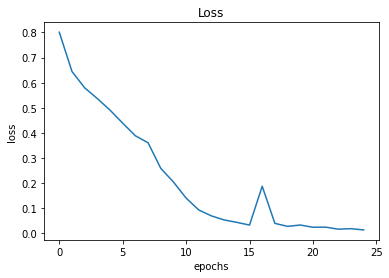

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Accuracy plot

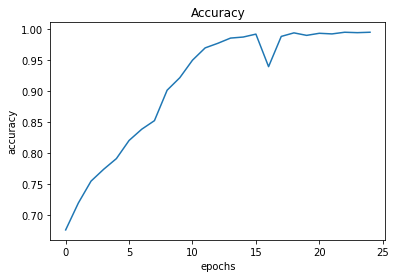

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
import pickle
with open('Age_model.pkl', 'wb') as file:
  pickle.dump(model_age, file)

INFO:tensorflow:Assets written to: ram://2f6dd7e5-dedd-4e1f-b0cf-7c3584c460c4/assets


Predicting the performance of the model

The person in the image is a man,
with the age below 30


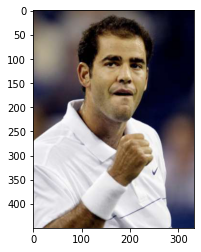

In [ ]:
from keras.preprocessing.image import img_to_array
from PIL import Image
import pickle

path='/content/drive/MyDrive/dataset/Age dataset/30-50/img_11830.jpg'#The Image was downloaded from the Google for model testing.

img=Image.open(path)
plt.imshow(img)
img=img.resize((200,200))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)

def pred(img):
  val=model.predict(img)
  if val==0:
    print('The person in the image is a man,')
  else:
    print('The person in the image is a woman,')  
  val_1=model_age.predict(img)
  if val_1[0][0]==0:
    print('with the age between 30-50')
  elif val_1[0][0]==1:
    print('with the age above 50')
  else:
    print('with the age below 30')
  
pred(img)

alter method of predicting the age and gender

In [ ]:
cascpath='/content/drive/MyDrive/dataset/haarcascade_frontalface_alt.xml'
facecascade=cv2.CascadeClassifier(cascpath)

path='/content/drive/MyDrive/dataset/Age dataset/30-50/img_11830.jpg'
img=cv2.imread(path)



gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = facecascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
font=cv2.FONT_HERSHEY_SIMPLEX
color=(255,0,0)
fontScale=1
org=(200,200)
thickness=2

from keras.preprocessing.image import img_to_array
from PIL import Image
i=Image.open(path)
plt.imshow(i)
i=i.resize((200,200))
i=img_to_array(i)
i=np.expand_dims(i,axis=0)

val=model.predict(i)
if val==0:
  val='male'
else:
  val='female'

val_1=model_age.predict(i)
if val_1[0][0]==0:
  val_1= '30-50'
elif val_1[0][0]==1:
  val_1= '50+'
else:
  val_1='below 30'


label="%s,%s"%(val,val_1)
image=cv2.putText(img,label ,org, font,fontScale, color,thickness)

plt.imshow(img)